In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
df2019 = pd.read_csv('vgsales-12-4-2019.csv')
df2020 = pd.read_csv('vgchartz-7_7_2020.csv')

In [3]:
df2019

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224682/indivisibl...,1,NaN,/games/boxart/full_6339426AmericaFrontccc.jpg
55788,55789,Lost Ember,lost-amber,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/games/game.php?id=2246...,1,NaN,/games/boxart/full_8893129AmericaFrontccc.jpg
55789,55790,Lost Ember,lost-amber,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224690/lost-ember...,1,NaN,/games/boxart/full_6514293AmericaFrontccc.jpg
55790,55791,Lost Ember,lost-amber,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224688/lost-ember...,1,NaN,/games/boxart/full_6799693AmericaFrontccc.jpg


In [4]:
df2020

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,3,/games/boxart/full_3351915AmericaFrontccc.jpg,Warriors,Series,Action,Unknown,Omega Force,NaN,NaN,NaN,42.06,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-24
1,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,2020-03-04
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,2020-02-03
3,6,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,NaN,9.4,NaN,NaN,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
4,7,/games/boxart/full_6800951AmericaFrontccc.jpg,Frogger,Series,Action,Konami,Konami|Parker Brothers|SCE Cambridge Studio|Bl...,NaN,NaN,NaN,20.00,NaN,NaN,NaN,NaN,NaN,1981-10-23,2020-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57945,58851,/games/boxart/full_2294305JapanFrontccc.jpg,World End Syndrome,PS4,Visual Novel,Arc System Works,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-26,2019-04-03
57946,58852,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
57947,58853,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
57948,58854,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09


In [5]:
df2019.rename({'Name': 'title'}, axis=1, inplace=True)
df2019=df2019[['title','ESRB_Rating']]
df2020.rename({'total_sales': 'global_sales'}, axis=1, inplace=True)
df2019

,title,ESRB_Rating
0,Wii Sports,E
1,Super Mario Bros.,NaN
2,Mario Kart Wii,E
3,PlayerUnknown's Battlegrounds,NaN
4,Wii Sports Resort,E
...,...,...
55787,Indivisible,NaN
55788,Lost Ember,RP
55789,Lost Ember,RP
55790,Lost Ember,RP


In [6]:
df_merged = pd.merge(df2020, df2019)
df_merged

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,ESRB_Rating
0,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,2020-03-04,M
1,50,/games/boxart/full_5633331AmericaFrontccc.jpg,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,NaN,M
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,2020-02-03,M
3,144,/games/boxart/full_8688619AmericaFrontccc.jpg,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,NaN,M
4,7454,/games/boxart/full_7401032AmericaFrontccc.jpg,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,2019-05-06,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130024,58846,/games/boxart/full_7024289AmericaFrontccc.jpg,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,2018-12-17,NaN
130025,58847,/games/boxart/default.jpg,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,2018-12-25,NaN
130026,58848,/games/boxart/default.jpg,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,2018-12-25,NaN
130027,58849,/games/boxart/default.jpg,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,2018-12-25,NaN


In [7]:
df_merged.drop_duplicates(keep='first',inplace=True)
df_merged

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,ESRB_Rating
0,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,2020-03-04,M
1,50,/games/boxart/full_5633331AmericaFrontccc.jpg,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,NaN,M
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,2020-02-03,M
3,144,/games/boxart/full_8688619AmericaFrontccc.jpg,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,NaN,M
4,7454,/games/boxart/full_7401032AmericaFrontccc.jpg,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,2019-05-06,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130022,58846,/games/boxart/full_7024289AmericaFrontccc.jpg,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,2018-12-17,NaN
130025,58847,/games/boxart/default.jpg,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,2018-12-25,NaN
130026,58848,/games/boxart/default.jpg,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,2018-12-25,NaN
130027,58849,/games/boxart/default.jpg,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,2018-12-25,NaN


In [8]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64406 entries, 0 to 130028
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     64406 non-null  int64  
 1   img            64406 non-null  object 
 2   title          64406 non-null  object 
 3   console        64406 non-null  object 
 4   genre          64406 non-null  object 
 5   publisher      64406 non-null  object 
 6   developer      64389 non-null  object 
 7   vg_score       1039 non-null   float64
 8   critic_score   8088 non-null   float64
 9   user_score     455 non-null    float64
 10  total_shipped  2630 non-null   float64
 11  global_sales   22585 non-null  float64
 12  na_sales       15703 non-null  float64
 13  jp_sales       7727 non-null   float64
 14  pal_sales      15930 non-null  float64
 15  other_sales    18563 non-null  float64
 16  release_date   60760 non-null  object 
 17  last_update    11412 non-null  object 
 18  ESRB_

In [9]:
df_merged.isnull().sum()

Unnamed: 0           0
img                  0
title                0
console              0
genre                0
publisher            0
developer           17
vg_score         63367
critic_score     56318
user_score       63951
total_shipped    61776
global_sales     41821
na_sales         48703
jp_sales         56679
pal_sales        48476
other_sales      45843
release_date      3646
last_update      52994
ESRB_Rating      35626
dtype: int64

In [10]:
df_merged.dropna(subset=['developer'],inplace=True)
df_merged = df_merged.reset_index(drop=True)
df_merged

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,ESRB_Rating
0,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,2020-03-04,M
1,50,/games/boxart/full_5633331AmericaFrontccc.jpg,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,NaN,M
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,2020-02-03,M
3,144,/games/boxart/full_8688619AmericaFrontccc.jpg,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,NaN,M
4,7454,/games/boxart/full_7401032AmericaFrontccc.jpg,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,2019-05-06,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64384,58846,/games/boxart/full_7024289AmericaFrontccc.jpg,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,2018-12-17,NaN
64385,58847,/games/boxart/default.jpg,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,2018-12-25,NaN
64386,58848,/games/boxart/default.jpg,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,2018-12-25,NaN
64387,58849,/games/boxart/default.jpg,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,2018-12-25,NaN


In [11]:
df_merged.drop(['Unnamed: 0', 'img','last_update'], axis = 1, inplace=True)
df_merged

,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,ESRB_Rating
0,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,M
1,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,M
2,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,M
3,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,M
4,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64384,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,NaN
64385,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,NaN
64386,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,NaN
64387,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,NaN


In [12]:
def addTotalSales(df_merged):
    if not pd.isna(df_merged['global_sales']):
        return df_merged['global_sales']
    elif not pd.isna(df_merged['total_shipped']):
        return df_merged['total_shipped']
    else:
        return df_merged['na_sales'] + df_merged['pal_sales'] + df_merged['jp_sales'] + df_merged['other_sales']

In [13]:
df_merged['Total_Sales'] = df_merged.apply(lambda x: addTotalSales(x), axis=1)

In [14]:
df_merged

,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,ESRB_Rating,Total_Sales
0,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,M,35.05
1,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,M,4.62
2,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,M,22.00
3,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,M,2.16
4,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64384,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,NaN,NaN
64385,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,NaN,NaN
64386,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,NaN,NaN
64387,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,NaN,NaN


In [15]:
df_merged.describe()

,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,Total_Sales
count,1039.000000,8088.000000,455.000000,2630.000000,22581.000000,15701.000000,7727.000000,15927.000000,18560.000000,25211.000000
mean,7.436189,7.221649,8.154066,4.478844,0.385150,0.281007,0.111896,0.160119,0.046605,0.812202
std,1.377524,1.454569,1.537340,17.079962,0.849354,0.517321,0.186099,0.403747,0.132149,5.712646
min,2.600000,1.000000,1.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.800000,6.400000,7.600000,0.210000,0.040000,0.050000,0.020000,0.010000,0.000000,0.050000
50%,7.800000,7.500000,8.500000,0.900000,0.130000,0.120000,0.050000,0.040000,0.010000,0.150000
75%,8.500000,8.300000,9.150000,2.390000,0.390000,0.300000,0.130000,0.150000,0.040000,0.470000
max,9.600000,10.000000,10.000000,310.000000,20.320000,9.760000,2.690000,9.850000,3.120000,310.000000


In [16]:
df_merged.describe(include=object)

,title,console,genre,publisher,developer,release_date,ESRB_Rating
count,64389,64389,64389,64389,64389,60749,28775
unique,36808,77,20,3141,8189,7387,8
top,The Incredible Hulk,PC,Misc,Unknown,Unknown,1994-01-01,E
freq,44,12171,10060,5144,4916,639,13144


# ESRB Rating

In [39]:
esrbToCount = df_merged[['title', 'ESRB_Rating']]
esrbToCount = esrbToCount.groupby(["ESRB_Rating"], as_index=False)['title'].nunique()

esrbToCount = esrbToCount.sort_values(by="title", ascending=False)

esrbToCount

,ESRB_Rating,title
1,E,7160
7,T,3767
5,M,1703
2,E10,1575
6,RP,229
3,EC,43
0,AO,17
4,KA,3


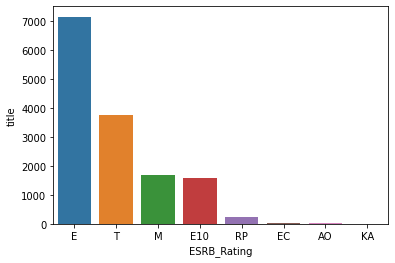

In [40]:
esrbtoCount_plot =  sns.barplot(data = esrbToCount, x = "ESRB_Rating", y = "title")

# ESRB Rating to Total Sales

In [19]:
esrbToTotal = df_merged[['title', 'ESRB_Rating', 'Total_Sales']]

esrbToTotal

,title,ESRB_Rating,Total_Sales
0,God of War,M,35.05
1,God of War,M,4.62
2,Devil May Cry,M,22.00
3,Devil May Cry,M,2.16
4,Devil May Cry,M,NaN
...,...,...,...
64384,WILL: A Wonderful World,NaN,NaN
64385,Without Within,NaN,NaN
64386,Without Within 2,NaN,NaN
64387,Without Within 3,NaN,NaN


In [20]:
esrbToTotal['Total_Sales'].describe()

count    25211.000000
mean         0.812202
std          5.712646
min          0.000000
25%          0.050000
50%          0.150000
75%          0.470000
max        310.000000
Name: Total_Sales, dtype: float64

(0.0, 100.0)

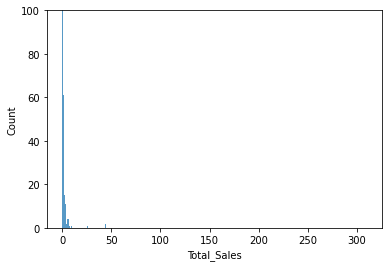

In [21]:
histo = sns.histplot(data=esrbToTotal, x  = 'Total_Sales')
plt.ylim(0, 100)

## Checking sales of AO and KA

In [22]:
esrbToTotal_a = esrbToTotal[esrbToTotal['ESRB_Rating'].str.contains('AO') == True]

esrbToTotal_a = esrbToTotal_a.groupby(["ESRB_Rating"], as_index=False)["Total_Sales"].sum()

esrbToTotal_a

,ESRB_Rating,Total_Sales
0,AO,1.41


In [30]:
esrbToTotal_b = esrbToTotal[esrbToTotal['ESRB_Rating'].str.contains('KA') == True]

esrbToTotal_b = esrbToTotal_b.groupby(["ESRB_Rating"], as_index=False)["Total_Sales"].sum()

esrbToTotal_b

,ESRB_Rating,Total_Sales
0,KA,0.0


## Plot ESRB Ratings to Sales


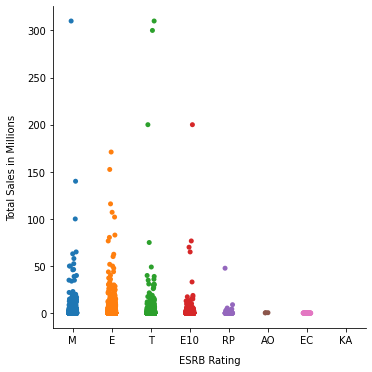

In [53]:
ESRB_sales_plot = sns.catplot(y = 'Total_Sales', x = 'ESRB_Rating', data=esrbToTotal)
ESRB_sales_plot.set_axis_labels("ESRB Rating", "Total Sales in Millions", labelpad=10)

# Genre to Total Sales

In [25]:
df_merged['genre'].describe()

count     64389
unique       20
top        Misc
freq      10060
Name: genre, dtype: object

In [26]:
df_merged['genre'].unique()

array(['Action', 'Action-Adventure', 'Platform', 'Misc', 'Racing',
       'Adventure', 'Role-Playing', 'Fighting', 'Shooter', 'Sandbox',
       'Sports', 'Strategy', 'Puzzle', 'Simulation', 'Visual Novel',
       'Party', 'Education', 'Music', 'Board Game', 'MMO'], dtype=object)

In [27]:
genre_sales =  df_merged.groupby(['genre'], as_index=False)['Total_Sales'].sum()
genre_sales

,genre,Total_Sales
0,Action,2086.52
1,Action-Adventure,2133.08
2,Adventure,754.22
3,Board Game,0.33
4,Education,130.42
5,Fighting,974.46
6,MMO,77.66
7,Misc,1150.87
8,Music,229.16
9,Party,169.98


In [28]:
total_per_genre = genre_sales['Total_Sales']

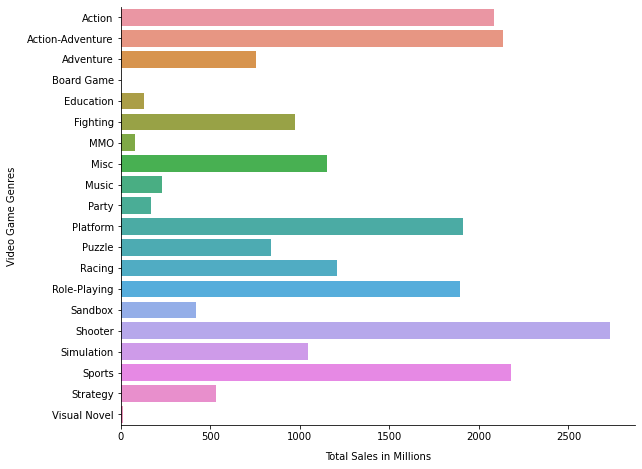

In [29]:
genre_sales_plot = sns.catplot(y = 'genre', x = 'Total_Sales', data=genre_sales, orient='h', kind='bar')
genre_sales_plot.fig.set_size_inches(10.5, 6.5)
genre_sales_plot.set_axis_labels("Total Sales in Millions", "Video Game Genres", labelpad=10)